In [2]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(egg)
library(grid)
library(tidyverse)
library(ggExtra)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


 要求されたパッケージ gridExtra をロード中です 


 次のパッケージを付け加えます: ‘gridExtra’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
data = read.csv("20230614_parsed_PPI_data.csv")

In [4]:
unique(data$State)

[1] "Anc"     "AB"      "A"       "Vehicle" "B"

In [5]:
unique(data$Ortholog.Species)

[1] "T.delbrueckii"       "V.polyspora"         "S.bayanusvar.uvarum"
 [4] "S.mikatae"           "S.kudriavzevii"      "K.africana"         
 [7] "T.blattae"           "Vehicle"             "N.dairenensis"      
[10] "N.castellii"         "K.naganishii"        "Z.rouxii"           
[13] "C.glabrata"          "T.phaffii"           "S.cerevisiae"

In [6]:
nrow(data)
data = data %>% filter(PPI.Scer != "NA")%>% filter(PPI.Scer != 0)
nrow(data)

[1] 1675

[1] 1613

In [7]:
unique(data$Ortholog.Species)

[1] "T.delbrueckii"       "V.polyspora"         "S.bayanusvar.uvarum"
 [4] "S.mikatae"           "S.kudriavzevii"      "K.africana"         
 [7] "T.blattae"           "Vehicle"             "N.dairenensis"      
[10] "N.castellii"         "K.naganishii"        "Z.rouxii"           
[13] "C.glabrata"          "T.phaffii"           "S.cerevisiae"

In [8]:
data$State = factor(data$State,levels=c("Anc","AB","A","B","Vehicle"))


In [9]:
data = data %>% mutate(MaxPPI=pmax(PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc, na.rm = TRUE))
#data = data %>% rowwise() %>% mutate(SumPPI=sum(PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc, na.rm = TRUE))
data$AvePPI = rowMeans(data[,9:11], na.rm=TRUE)

#data = data %>% filter(AvePPI != "NaN")

data$RelPPI = data$AvePPI/data$PPI.Scer
data$RelPPIMax = data$MaxPPI/data$PPI.Scer
#unique(data$Ortholog.Species)
head(data)

,PPI_partner.Gene,PPI_partner.ORF,Ortholog.Species,State,PPI.NA,Ortholog.GeneA,Ortholog.GeneB,Ortholog.GeneAnc,PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc,PPI.A_div_B,PPI.Scer,PPI.Vehicle,MaxPPI,AvePPI,RelPPI,RelPPIMax
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YLR027C,AAT2,T.delbrueckii,Anc,No,,,TDEL0E05230,NA,NA,51992.75,1.000000,10368.75,4043,51992.75,51992.75,5.014370,5.014370
2,YLR027C,AAT2,V.polyspora,AB,No,Kpol_1002.53,Kpol_1033.51,,29039.75,15932.00,NA,1.822731,10368.75,4043,29039.75,22485.88,2.168620,2.800699
3,YLR027C,AAT2,S.bayanusvar.uvarum,A,No,Suva_16.102,,,25431.25,NA,NA,25431.250000,10368.75,4043,25431.25,25431.25,2.452682,2.452682
4,YLR027C,AAT2,S.mikatae,A,No,Smik_6.409,,,10516.75,NA,NA,10516.750000,10368.75,4043,10516.75,10516.75,1.014274,1.014274
5,YLR027C,AAT2,S.kudriavzevii,A,No,Skud_16.75,,,10875.50,NA,NA,10875.500000,10368.75,4043,10875.50,10875.50,1.048873,1.048873
6,YLR027C,AAT2,K.africana,AB,No,KAFR0K00320,KAFR0C02290,,73575.50,31606.75,NA,2.327841,10368.75,4043,73575.50,52591.12,5.072080,7.095889


In [10]:
#data %>% filter(Ortholog.Species=="Vehicle")

In [11]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Vwhicle
data_v = data_complete %>% filter(State=="Vehicle")
for (species in unique(data_v$Ortholog.Species) ){
data_sp= data_v %>% filter(Ortholog.Species==species)

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.Anc+1))) + 
                       geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
 geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [12]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Vwhicle
data_v = data_complete %>% filter(State=="Anc")
for (species in unique(data_v$Ortholog.Species) ){
data_sp= data_v %>% filter(Ortholog.Species==species)

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.Anc+1))) + 
            geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
            geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [13]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy A
data_A = data_complete %>% filter(State=="A")
for (species in unique(data_A$Ortholog.Species) ){
data_sp= data_A %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                       geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
 geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [14]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy B
data_B = data_complete %>% filter(State=="B")
for (species in unique(data_B$Ortholog.Species) ){
data_sp= data_B %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                      geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
  geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [46]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy AB
data_A = data_complete %>% filter(State=="AB")
for (species in unique(data_A$Ortholog.Species) ){
data_sp= data_A %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                 geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
       geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter_A.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

data_B = data_complete %>% filter(State=="AB")
for (species in unique(data_B$Ortholog.Species) ){
data_sp= data_B %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                      geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
  geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_vsScer_scatter_B.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}


data_AB = data_complete %>% filter(State=="AB")
for (species in unique(data_AB$Ortholog.Species) ){
data_sp= data_AB %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Ortholog.GeneA+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                        geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ 'PPI score A'))+
         ylab(bquote(~Log[10]~ 'PPI score B'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230703/",species,"_scatter_AvsB.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [15]:
data_complete= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")%>% filter(Ortholog.Species!="S.cerevisiae")

data_complete$Ortholog.Species = factor(data_complete$Ortholog.Species, levels= c('N.castellii','V.polyspora','T.phaffii','K.naganishii','K.africana','N.dairenensis','T.blattae'))

head(data_complete)


,PPI_partner.Gene,PPI_partner.ORF,Ortholog.Species,State,PPI.NA,Ortholog.GeneA,Ortholog.GeneB,Ortholog.GeneAnc,PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc,PPI.A_div_B,PPI.Scer,PPI.Vehicle,MaxPPI,AvePPI,RelPPI,RelPPIMax
,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YLR027C,AAT2,V.polyspora,AB,No,Kpol_1002.53,Kpol_1033.51,,29039.75,15932.00,NA,1.82273098,10368.75,4043,29039.75,22485.88,2.168620,2.800699
2,YLR027C,AAT2,K.africana,AB,No,KAFR0K00320,KAFR0C02290,,73575.50,31606.75,NA,2.32784136,10368.75,4043,73575.50,52591.12,5.072080,7.095889
3,YLR027C,AAT2,T.blattae,AB,No,TBLA0A02040,TBLA0B05310,,5612.00,58258.00,NA,0.09633012,10368.75,4043,58258.00,31935.00,3.079928,5.618614
4,YLR027C,AAT2,N.dairenensis,AB,No,NDAI0F01640,NDAI0I01070,,3752.00,49981.00,NA,0.07506853,10368.75,4043,49981.00,26866.50,2.591103,4.820350
5,YLR027C,AAT2,N.castellii,AB,No,NCAS0A01090,NCAS0D03820,,4660.75,23907.00,NA,0.19495336,10368.75,4043,23907.00,14283.88,1.377589,2.305678
6,YLR027C,AAT2,K.naganishii,AB,No,KNAG0D01130,KNAG0F01980,,9510.50,54301.25,NA,0.17514330,10368.75,4043,54301.25,31905.88,3.077119,5.237010


In [16]:
write.csv(data_complete,"PPI_data_for_scatterplotannotation.csv")


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


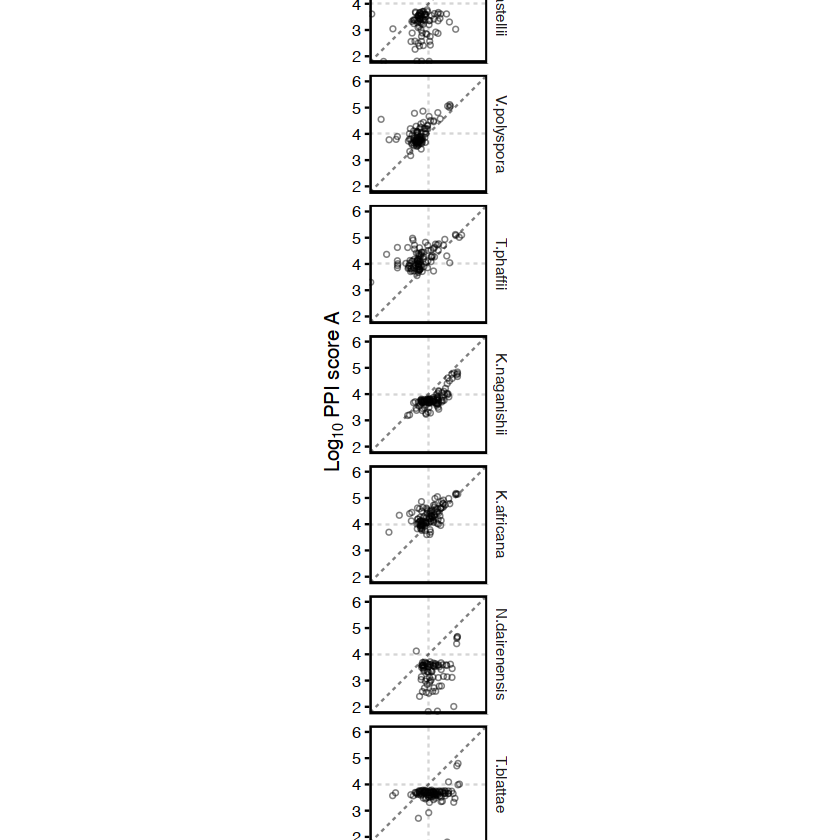

In [13]:




scatter  = ggplot(data=data_complete,aes(x=log10(PPI.Ortholog.GeneB+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                        geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.5, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ 'PPI score B'))+
         ylab(bquote(~Log[10]~ 'PPI score A'))+
    facet_wrap(~Ortholog.Species,strip.position="right",nrow=7)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    grid.newpage()
    grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230730/PostWGD_ABratio_scatter_l.pdf" ,sep=""),width=unit(3,"cm"),height=unit(10,"cm"))



In [788]:
# Rel PPI vs Scer vs A/B ratio
data_completedata= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")
scatter  = ggplot(data=data_completedata,aes(x=log10(PPI.A_div_B),y=log10(RelPPIMax),color=log10(PPI.Scer+1))) + 
            geom_hline(yintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_point(alpha=1.0,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(-2.25,2.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='bottom',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#000000","#000000","#FF0000","#FFFF00"),limits=c(0,6),na.value="#00FFFF")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        ylab(bquote(~Log[10]~ '(PPI score /'~italic(Scer)~')'))+
         xlab(bquote(~Log[10]~ '(A / B)'))+
    facet_wrap(~Ortholog.Species,nrow=1)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/Species/SpeciesLegend_scatter.pdf" ,sep=""),width=unit(14,"cm"),height=unit(4,"cm"))


for (species in unique(data_completedata$Ortholog.Species) ){

data_sp= data %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")%>% filter(State=="AB")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.A_div_B),y=log10(RelPPIMax),color=log10(PPI.Scer+1))) + 
            geom_hline(yintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_point(alpha=1.0,size=1,shape=1)+
                       scale_y_continuous(expand=c(0,0),limits=c(-2.25,2.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#000000","#000000","#FF0000","#FFFF00"),limits=c(0,6),na.value="#00FFFF")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        ylab(bquote(~Log[10]~ '(PPI score /'~italic(Scer)~')'))+
         xlab(bquote(~Log[10]~ '(A / B)'))+
    facet_wrap(~Ortholog.Species)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/Species/",species,"_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

In [789]:
# PPI score vs A/ B ratio

data_completedata= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")
scatter  = ggplot(data=data_completedata,aes(x=log10(PPI.A_div_B),y=log10(MaxPPI),color=log10(PPI.Scer+1))) + 
            geom_hline(yintercept=4,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_point(alpha=1.0,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.5)) +  
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='bottom',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#000000","#000000","#FF0000","#FFFF00"),limits=c(0,6),na.value="#00FFFF")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        ylab(bquote(~Log[10]~ '(PPI score)'))+
         xlab(bquote(~Log[10]~ '(A / B)'))+
    facet_wrap(~Ortholog.Species,nrow=1)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/Species/SpeciesLegend_rawPPI_scatter.pdf" ,sep=""),width=unit(14,"cm"),height=unit(4,"cm"))


for (species in unique(data_completedata$Ortholog.Species) ){

data_sp= data %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")%>% filter(State=="AB")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.A_div_B),y=log10(MaxPPI),color=log10(PPI.Scer+1))) + 
            geom_hline(yintercept=4,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_point(alpha=1.0,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.5)) +  
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#000000","#000000","#FF0000","#FFFF00"),limits=c(0,6),na.value="#00FFFF")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        ylab(bquote(~Log[10]~ '(PPI score)'))+
         xlab(bquote(~Log[10]~ '(A / B)'))+
    facet_wrap(~Ortholog.Species)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/Species/",species,"raw_PPI_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

In [10]:
data_complete= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")%>% filter(Ortholog.Species!="S.cerevisiae")
head(data_complete)
unique(data_complete$Ortholog.Species)

,PPI_partner.Gene,PPI_partner.ORF,Ortholog.Species,State,PPI.NA,Ortholog.GeneA,Ortholog.GeneB,Ortholog.GeneAnc,PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc,PPI.A_div_B,PPI.Scer,PPI.Vehicle,MaxPPI,AvePPI,RelPPI,RelPPIMax
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YLR027C,AAT2,V.polyspora,AB,No,Kpol_1002.53,Kpol_1033.51,,29039.75,15932.00,NA,1.82273098,10368.75,4043,29039.75,22485.88,2.168620,2.800699
2,YLR027C,AAT2,K.africana,AB,No,KAFR0K00320,KAFR0C02290,,73575.50,31606.75,NA,2.32784136,10368.75,4043,73575.50,52591.12,5.072080,7.095889
3,YLR027C,AAT2,T.blattae,AB,No,TBLA0A02040,TBLA0B05310,,5612.00,58258.00,NA,0.09633012,10368.75,4043,58258.00,31935.00,3.079928,5.618614
4,YLR027C,AAT2,N.dairenensis,AB,No,NDAI0F01640,NDAI0I01070,,3752.00,49981.00,NA,0.07506853,10368.75,4043,49981.00,26866.50,2.591103,4.820350
5,YLR027C,AAT2,N.castellii,AB,No,NCAS0A01090,NCAS0D03820,,4660.75,23907.00,NA,0.19495336,10368.75,4043,23907.00,14283.88,1.377589,2.305678
6,YLR027C,AAT2,K.naganishii,AB,No,KNAG0D01130,KNAG0F01980,,9510.50,54301.25,NA,0.17514330,10368.75,4043,54301.25,31905.88,3.077119,5.237010


[1] "V.polyspora"   "K.africana"    "T.blattae"     "N.dairenensis"
[5] "N.castellii"   "K.naganishii"  "T.phaffii"

In [804]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")
scatter  = ggplot(data=data_complete,aes(x=log10(PPI.Scer+1),y=log10(MaxPPI+1),color=log10(PPI.A_div_B))) + 
            #geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=1.0)+
            geom_point(alpha=0.5,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='bottom',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#FF0000","#ababab","#0000FF"),limits=c(-5.5,5.5),na.value="#FFFF00")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,nrow=1)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230615/Species/Scatter_VS_Scer_Duplicates.pdf" ,sep=""),width=unit(14,"cm"),height=unit(4,"cm"))


data_complete= data %>% filter(PPI.NA=="No")%>% filter(State!="AB")%>% filter(Ortholog.Species!="S.cerevisiae")
scatter  = ggplot(data=data_complete,aes(x=log10(PPI.Scer+1),y=log10(MaxPPI+1))) + 
            #geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=1.0)+
            geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='bottom',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,nrow=1)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230615/Species/Scatter_VS_Scer_Singlecopy.pdf" ,sep=""),width=unit(14,"cm"),height=unit(4,"cm"))



for (species in unique(data_complete$Ortholog.Species) ){

data_sp= data_complete %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(MaxPPI+1),color=log10(PPI.A_div_B))) + 
            #geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=1.0)+
            geom_point(alpha=0.5,size=1,shape=1)+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_colour_gradientn(colors=c("#FF0000","#ababab","#0000FF"),limits=c(-5.5,5.5),na.value="#FFFF00")+
          scale_shape_manual(values=c("A"=2,"AB"=5,"Anc"=1,"B"=6,"Vehicle"=4))+
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230615/Species/",species,"_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [805]:
# Histograms of A/B ratio 
data_complete= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")
scatter  = ggplot(data=data_complete,aes(x=log10(PPI.A_div_B))) + 
            #geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_abline(slope=1.0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_histogram(aes(fill=..x..),bins=20)+
            scale_y_continuous(expand=c(0,0),limits=c(-2.5,77.5),breaks=c(0,25,50,75)) + 
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='bottom',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_fill_gradientn(colors=c("#FF0000","#ababab","#0000FF"),limits=c(-5.5,5.5))+
        xlab("Relative PPI score A / B")+
         ylab('Interactors')+
    facet_wrap(~Ortholog.Species,nrow=1)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230615/Species/Histogram_ALL_vs_Scer.pdf" ,sep=""),width=unit(14,"cm"),height=unit(4,"cm"))





for (species in unique(data_complete$Ortholog.Species) ){

data_sp= data_complete %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.A_div_B))) + 
            #geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=0,linetype="dashed",color="#ababab",alpha=0.5)+
            #geom_abline(slope=1.0,linetype="dashed",color="#ababab",alpha=0.5)+
            geom_histogram(aes(fill=..x..),bins=20)+
            scale_y_continuous(expand=c(0,0),limits=c(-2.5,77.5),breaks=c(0,25,50,75)) + 
            scale_x_continuous(expand=c(0,0),limits=c(-5.5,5.5),breaks=c(-5,0,5)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
            scale_fill_gradientn(colors=c("#FF0000","#ababab","#0000FF"),limits=c(-5.5,5.5))+
        xlab("Relative PPI score A / B")+
         ylab('Interactors')+
    facet_wrap(~Ortholog.Species)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("./plot/v20230615/Species/",species,"_histogram.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

In [792]:
data_Ncas = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="N.castellii")
data_Ncas_ppi_A = data_Ncas %>% filter(PPI.Ortholog.GeneA > 10000)
data_Ncas_ppi_B = data_Ncas %>% filter(PPI.Ortholog.GeneB > 10000)

data_Kafr = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="K.africana")
data_Knag = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="K.naganishii")

data_Skud = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="S.kudriavzevii")
data_Tpha = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="T.phaffii")

data_Ndar = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="N.dairenensis")
data_Vpol = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="V.polyspora")

data_Tbla = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="T.blattae")

data_Scer = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species=="S.cerevisiae")
data_Scer_ppi = data_Scer %>% filter(MaxPPI > 10000)

In [793]:
#data_Skud[order(data_Skud$RelPPIMax, decreasing = TRUE), ]

#data_Tpha[order(data_Tpha$RelPPIMax, decreasing = FALSE), ]
#data_Tpha[order(data_Tpha$PPI.A_div_B, decreasing = TRUE), ]

#data_Ncas[order(data_Ncas$RelPPIMax, decreasing = FALSE), ]

#data_Ndar[order(data_Ndar$PPI.A_div_B, decreasing = FALSE), ]

#data_Vpol[order(data_Vpol$PPI.Ortholog.GeneB, decreasing = TRUE), ]


#data_Tbla[order(data_Tbla$PPI.A_div_B, decreasing = TRUE), ]
#data_Tbla[order(data_Tbla$RelPPIMax, decreasing = TRUE), ]


#data_Kafr[order(data_Kafr$PPI.A_div_B, decreasing = TRUE), ]
#data_Kafr[order(data_Kafr$RelPPIMax, decreasing = TRUE), ]


#data_Knag[order(data_Knag$RelPPIMax, decreasing = TRUE), ]
#data_Knag[order(data_Knag$RelPPIMax, decreasing = FALSE), ]

#data_Knag[order(data_Knag$RelPPIMax, decreasing = FALSE), ]

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


ERROR: Error in grDevices::pdf(file = filename, ..., version = version):  ファイル './plot/v20230730/PostWGD_ABratio_scatter.pdf' を開けません 


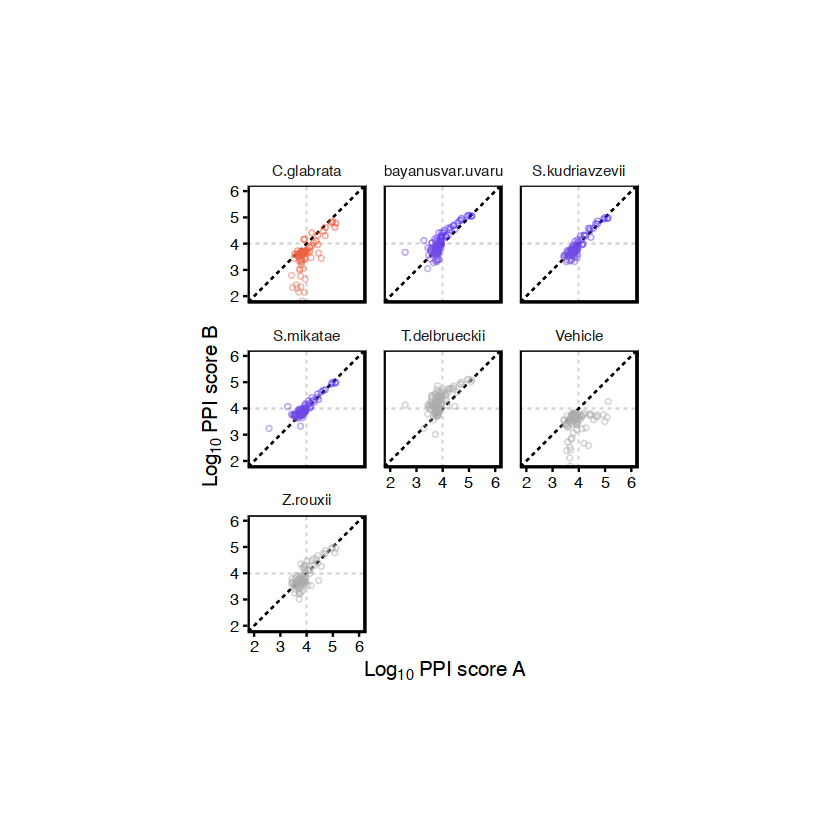

In [705]:
species_list= c(
                    'T.delbrueckii',
                    'Z.rouxii' ,
                    'N.castellii',
                    'V.polyspora',
                    'K.africana' ,
                    'T.blattae'  ,
                    'N.dairenensis',
                    'K.naganishii',
                    'T.phaffii'   ,
                    'C.glabrata'  ,
                    'S.bayanusvar.uvarum' , 
                    'S.mikatae'           , 
                    'S.kudriavzevii'      ,
                    'S.cerevisiae'
)

In [706]:
species_dup_state = c(
                    'T.delbrueckii' = "Anc",
                    'Z.rouxii' = "Anc",
                    'N.castellii' = "AB",
                    'V.polyspora' = "AB",
                    'K.africana'  = "AB",
                    'T.blattae'   = "AB",
                    'N.dairenensis'="AB",
                    'K.naganishii'= "AB",
                    'T.phaffii'   = "AB",
                    'C.glabrata'          = "B",
                    'S.bayanusvar.uvarum' = "A", 
                    'S.mikatae'           = "A", 
                    'S.kudriavzevii'      = "A",
                    'S.cerevisiae'="A"
)

In [707]:
Scer = clusterProfiler::enrichGO(data_Scer_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
columns = c("ID","Description","geneID")

df_merged = data.frame(matrix(ncol = length(columns ), nrow = 0))
names(df_merged)= columns


In [708]:
for (species in unique(data$Ortholog.Species) ){
     data_sp = data %>% filter(PPI.NA=="No")%>% filter(Ortholog.Species==species)
    
   if (species %in% species_list) {
    species_dup = species_dup_state[[species]]
    
    if (species_dup == "Anc" ){
        sample = paste(species,species_dup,sep=".")
        
        data_ppi = data_sp %>% filter(PPI.Ortholog.Anc > 10000)
        go_en    = clusterProfiler::enrichGO(data_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
        df_go    = data.frame(go_en)
        names(df_go)[6] = sample
        df_merged = merge(df_merged,df_go%>% dplyr::select(c(1,2,6,8)),by=c("ID","Description","geneID"), all=T)
        write.csv(df_go,paste("./GO/",sample,".csv",sep=""))
    }#IF Anc
       
    if (species_dup == "AB" ){
        sample = paste(species,"A",sep=".")
        data_ppi = data_sp %>% filter(PPI.Ortholog.GeneA > 10000)
        go_en    = clusterProfiler::enrichGO(data_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
        df_go    = data.frame(go_en)
        #df_go$Ortholog = sample
        names(df_go)[6] = sample
        df_merged = merge(df_merged,df_go%>% dplyr::select(c(1,2,6,8)),by=c("ID","Description","geneID"), all=T)
        write.csv(df_go,paste("./GO/",sample,".csv",sep=""))
        
        sample = paste(species,"B",sep=".")
        data_ppi = data_sp %>% filter(PPI.Ortholog.GeneB > 10000)
        go_en    = clusterProfiler::enrichGO(data_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
        df_go    = data.frame(go_en)
        #df_go$Ortholog = sample
        names(df_go)[6] = sample
        df_merged = merge(df_merged,df_go%>% dplyr::select(c(1,2,6,8)),by=c("ID","Description","geneID"), all=T)
        write.csv(df_go,paste("./GO/",sample,".csv",sep=""))
    }#IF AB
       
    if (species_dup == "A" ){
        sample = paste(species,"A",sep=".")
        data_ppi = data_sp %>% filter(PPI.Ortholog.GeneA > 10000)
        go_en    = clusterProfiler::enrichGO(data_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
        df_go    = data.frame(go_en)
        #df_go$Ortholog = sample
        names(df_go)[6] = sample
        df_merged = merge(df_merged,df_go%>% dplyr::select(c(1,2,6,8)),by=c("ID","Description","geneID"), all=T)
        write.csv(df_go,paste("./GO/",sample,".csv",sep=""))
    }#IF A
    if (species_dup == "B" ){
        sample = paste(species,"B",sep=".")
        data_ppi = data_sp %>% filter(PPI.Ortholog.GeneB > 10000)
        go_en    = clusterProfiler::enrichGO(data_ppi$PPI_partner.ORF, OrgDb = org.Sc.sgd.db::org.Sc.sgd.db, ont = "CC",  keyType = "GENENAME")
        df_go    = data.frame(go_en)
        #df_go$Ortholog = sample
        names(df_go)[6] = sample
        df_merged = merge(df_merged,df_go%>% dplyr::select(c(1,2,6,8)),by=c("ID","Description","geneID"), all=T)
        write.csv(df_go,paste("./GO/",sample,".csv",sep=""))
    }#IF B
       
    
   }#IF in species_list
    }# FOR species

In [709]:
write.csv(df_merged,paste("./GO/Merged_GO_adjPval_results.csv",sep=""))

In [710]:
df_merged[is.na(df_merged)] <- 1

In [ ]:

  summarize( = min(Age), minAgeName = Name[which.min(Age)], 
            maxAge = max(Age), maxAgeName = Name[which.max(Age)])

In [712]:
df_agg = df_merged %>% group_by(Description) %>%
  summarize(T.delbrueckii.Anc       = min(T.delbrueckii.Anc),
            Z.rouxii.Anc            = min(Z.rouxii.Anc),
            S.cerevisiae.A          = min(S.cerevisiae.A),
            S.bayanusvar.uvarum.A   = min(S.bayanusvar.uvarum.A),
            S.mikatae.A             = min(S.mikatae.A),
            S.kudriavzevii.A        = min(S.kudriavzevii.A),
            C.glabrata.B            = min(C.glabrata.B),
            N.castellii.A           = min(N.castellii.A),
            N.castellii.B           = min(N.castellii.B),
            V.polyspora.A           = min(V.polyspora.A),
            V.polyspora.B           = min(V.polyspora.B),
            K.africana.A            = min(K.africana.A),
            K.africana.B            = min(K.africana.B),
            T.blattae.A             = min(T.blattae.A),
            T.blattae.B             = min(T.blattae.B),
            N.dairenensis.A         = min(N.dairenensis.A),
            N.dairenensis.B         = min(N.dairenensis.B),
            K.naganishii.A          = min(K.naganishii.A),
            K.naganishii.B          = min(K.naganishii.B),
            T.phaffii.A             = min(T.phaffii.A),
            T.phaffii.B             = min(T.phaffii.B)
           )

In [725]:
df_agg_hmap = melt(df_agg,id.vars=c("Description"))
df_agg_hmap$variable = factor(df_agg_hmap$variable,levels=c("S.cerevisiae.A","T.delbrueckii.Anc","Z.rouxii.Anc","S.bayanusvar.uvarum.A","S.mikatae.A","S.kudriavzevii.A","C.glabrata.B","N.castellii.A","N.castellii.B","V.polyspora.A","V.polyspora.B","K.africana.A","K.africana.B","T.blattae.A","T.blattae.B","N.dairenensis.A","N.dairenensis.B","K.naganishii.A","K.naganishii.B","T.phaffii.A","T.phaffii.B"))
#unique(df_agg_hmap$Description)
#df_agg_hmap$Description = factor(df_agg_hmap$Description,levels=c())
names(df_agg_hmap)[2] ="Ortholog"
names(df_agg_hmap)[3] ="Adjusted.Pval"

In [726]:
head(df_agg_hmap)

,Description,Ortholog,Adjusted.Pval
,<chr>,<fct>,<dbl>
1,COPI-coated vesicle,T.delbrueckii.Anc,1.000000000
2,COPI-coated vesicle membrane,T.delbrueckii.Anc,0.043378732
3,Golgi apparatus,T.delbrueckii.Anc,1.000000000
4,Golgi membrane,T.delbrueckii.Anc,0.008240677
5,Golgi-associated vesicle,T.delbrueckii.Anc,1.000000000
6,Golgi-associated vesicle membrane,T.delbrueckii.Anc,0.012774805


In [765]:
write.csv(df_agg_hmap,"GO_aggregated_results.csv")

In [731]:
Y = length(unique(df_agg_hmap$Description))
X = length(unique(df_agg_hmap$Ortholog))


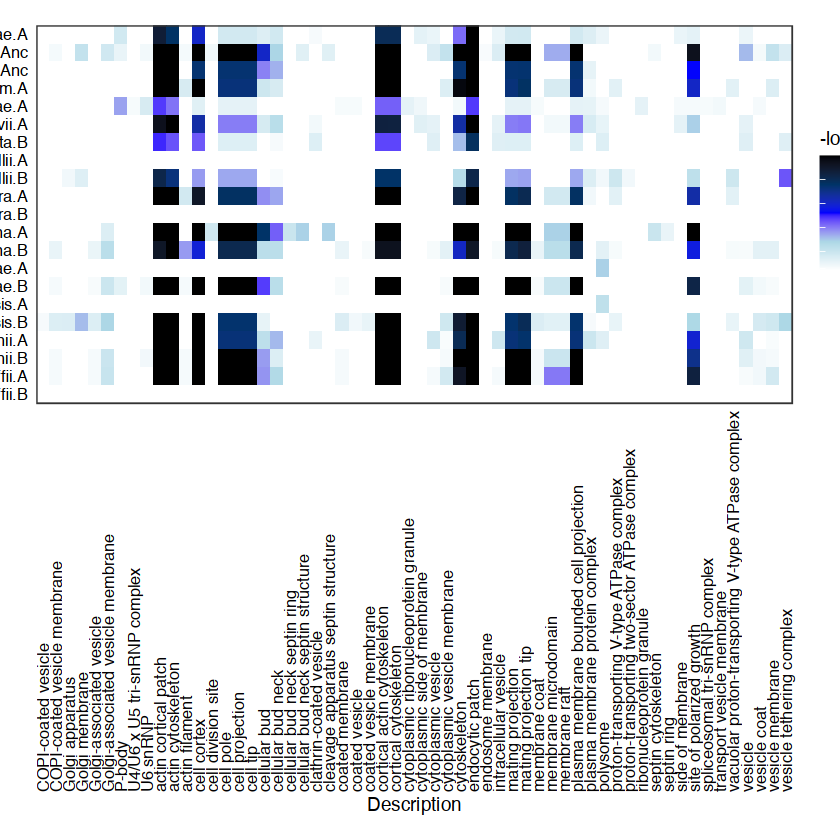

In [773]:
heatmap  =  ggplot(df_agg_hmap )+   
            geom_tile(aes(x=Description,y=Ortholog,fill = -log10(Adjusted.Pval)))  + 
            theme_bw()   + 
            theme(legend.position='right',
                  legend.key = element_blank(), 
                  strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF"),
                  panel.grid.minor = element_blank(),
                  panel.grid.major = element_blank(),
                  panel.background = element_blank(),
                  axis.ticks = element_blank(),
                  axis.text.x = element_text(size=9.5,color="#000000",angle=90,hjust=0,vjust=0.5),
                  axis.text.y = element_text(size=9.5,color="#000000")#element_blank()
                 )+ 
            scale_x_discrete(expand=c(0,0)) + 
            scale_y_discrete(expand=c(0,0),limits=rev) +
            scale_fill_gradientn(colors=c("#FFFFFF","#FFFFFF","#ADD8E6","#0000FF","#003366","#000000"),breaks=c(0,-log10(0.05),-log10(0.01),-log10(0.001),-log10(0.0001),-log10(0.00001)),limits=c(0,6),na.value="#000000")+
             scale_colour_continuous(guide = guide_legend(direction = "vertical", title.position = "left",
                             label.position="right", label.hjust = 0.5, label.vjust = 0.5,
                             label.theme = element_text(angle = 90)))

p <- set_panel_size(heatmap,width  = unit(16, "cm"),height = unit(8, "cm"))
grid.newpage()
grid.draw(p) 
ggsave(plot=p,"heatmap_5x5cm.pdf",width  = unit(10, "cm"),height = unit(10, "cm"))